In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical

    DDoS-SDN

In [4]:
data = pd.read_csv("dataset_sdn.csv")
# Определение целевой переменной и признаков
y = data['label']  # Целевая переменная
X = data.drop('label', axis=1)  # Признаки

# Обработка категориальных признаков
X = pd.get_dummies(X, columns=['src', 'dst', 'Protocol'], drop_first=True)

In [5]:
# Преобразование данных в формат, подходящий для CNN 
X = X.values.reshape(X.shape[0], X.shape[1], 1)  # Преобразуем в 3D массив (samples, features, channels)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование y в категориальный формат
y_train = pd.get_dummies(y_train).values  # Преобразование в one-hot encoding
y_test = pd.get_dummies(y_test).values

In [6]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32) 
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)  # может в  np.int3 попробовать

In [7]:
from tensorflow.keras.utils import to_categorical

# Преобразование y_train в one-hot encoding, если это необходимо
if y_train.ndim == 1:
    y_train = to_categorical(y_train)

# Аналогично для y_test
if y_test.ndim == 1:
    y_test = to_categorical(y_test)

In [8]:
# Добавление дополнительного измерения, если это необходимо
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Преобразование в (samples, time_steps, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Аналогично для тестовых данных

In [9]:
print(f'размер X_train: {X_train.shape}')
print(f'размер y_train: {y_train.shape}')
print(f'размер X_test: {X_test.shape}')
print(f'размер y_test: {y_test.shape}')

размер X_train: (83476, 56, 1)
размер y_train: (83476, 2)
размер X_test: (20869, 56, 1)
размер y_test: (20869, 2)


In [10]:
print(f'тип X_train: {X_train.dtype}')
print(f'тип y_train: {y_train.dtype}')
print(f'тип X_test: {X_test.dtype}')
print(f'тип y_test: {y_test.dtype}')

тип X_train: float32
тип y_train: float32
тип X_test: float32
тип y_test: float32


In [24]:
# Создание модели CNN
model = models.Sequential()
# Используем Input как первый слой
model.add(Input(shape=(X_train.shape[1], 1)))  # Указываем форму входных данных

model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))  # Выходной слой

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Тестовая точность: {test_acc:.4f}')

Epoch 1/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6004 - loss: 20136666.0000 - val_accuracy: 0.6096 - val_loss: 0.6692
Epoch 2/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6109 - loss: 0.6684 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 3/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6103 - loss: 0.6687 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 4/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6096 - loss: 0.6690 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 5/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6091 - loss: 0.6692 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 6/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6105 - loss: 0.6686 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 7/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6068 - loss: 0.6702 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 8/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6079 - loss: 0.

In [12]:
# Создание и обучение CNN модели
model = models.Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, 
                   epochs=10, 
                   batch_size=32, 
                   validation_data=(X_test, y_test))

# Оценка модели
test_loss, test_acc = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred, output_dict=True)

# Создаем таблицу результатов
results = {
    'Model': ['CNN'],
    'Accuracy': [test_acc],
    'Precision (weighted avg)': [report['weighted avg']['precision']],
    'Recall (weighted avg)': [report['weighted avg']['recall']],
    'F1-score (weighted avg)': [report['weighted avg']['f1-score']],
    'Training Time (epochs)': [len(history.history['loss'])],
    'Final Loss': [history.history['loss'][-1]],
    'Validation Accuracy': [history.history['val_accuracy'][-1]]
}

# Создаем DataFrame
results_df = pd.DataFrame(results)

# Сохраняем в CSV
results_df.to_csv('cnn_model_results_ddos.csv', index=False)

# Выводим красивую таблицу
print("\nРезультаты CNN модели в наборе данных DDos-SDN:")
print("="*70)
print(results_df.to_string(index=False, float_format="%.4f", justify='center'))
print("="*70)

# Дополнительно: вывод метрик по классам
class_metrics = []
for class_name in report:
    if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
        class_metrics.append({
            'Class': class_name,
            'Precision': report[class_name]['precision'],
            'Recall': report[class_name]['recall'],
            'F1-score': report[class_name]['f1-score'],
            'Support': report[class_name]['support']
        })

class_metrics_df = pd.DataFrame(class_metrics)
print("\nМетрики по классам:")
print("="*70)
print(class_metrics_df.to_string(index=False, float_format="%.4f", justify='center'))

Epoch 1/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6050 - loss: 23541280.0000 - val_accuracy: 0.6096 - val_loss: 0.6690
Epoch 2/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6063 - loss: 0.6704 - val_accuracy: 0.6096 - val_loss: 0.6690
Epoch 3/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6113 - loss: 0.6682 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 4/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6058 - loss: 0.6707 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 5/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6114 - loss: 0.6681 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 6/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6078 - loss: 0.6698 - val_accuracy: 0.6096 - val_loss: 0.6689
Epoch 7/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6098 - loss: 0.6689 - val_accuracy: 0.6096 - val_loss: 0.6690
Epoch 8/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6099 - 

c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cnn_model_results_ddos.csv')

# График точности (Accuracy)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='Blues')
plt.title('Точность (Accuracy) CNN модели')
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Модель')
for i, acc in enumerate(df['Accuracy']):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center')
plt.savefig('cnn_accuracy_ddos.png', bbox_inches='tight')
plt.show()

# Сравнение метрик (Precision, Recall, F1)
metrics = ['Precision (weighted avg)', 'Recall (weighted avg)', 'F1-score (weighted avg)']
plt.figure(figsize=(12, 6))
df_metrics = df[metrics].transpose()
sns.barplot(x=df_metrics.index, y=df_metrics[0], palette='viridis')
plt.title('Сравнение метрик CNN модели')
plt.ylabel('Значение метрики')
plt.ylim(0, 1.0)
for i, val in enumerate(df_metrics[0]):
    plt.text(i, val + 0.01, f"{val:.4f}", ha='center')
plt.savefig('cnn_metrics_comparison.png', bbox_inches='tight')
plt.show()

# Тепловая карта метрик
plt.figure(figsize=(8, 4))
sns.heatmap(df[metrics].transpose(), annot=True, fmt='.4f', cmap='YlGnBu', 
            yticklabels=['Precision', 'Recall', 'F1-score'])
plt.title('Тепловая карта метрик CNN модели')
plt.savefig('cnn_metrics_heatmap_ddos.png', bbox_inches='tight')
plt.show()

# График по классам (если есть данные)
if 'Class' in df.columns:
    plt.figure(figsize=(12, 6))
    class_metrics = df[['Class', 'Precision', 'Recall', 'F1-score']]
    class_metrics = class_metrics.set_index('Class')
    class_metrics.plot(kind='bar', rot=0, figsize=(12, 6), colormap='Paired')
    plt.title('Метрики по классам')
    plt.ylabel('Значение метрики')
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.savefig('cnn_class_metrics_ddos.png', bbox_inches='tight')
    plt.show()

# Кривая обучения (если есть история обучения)
if 'Final Loss' in df.columns and 'Validation Accuracy' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot([df['Final Loss'].values[0]], marker='o', label='Final Loss', color='red')
    plt.plot([df['Validation Accuracy'].values[0]], marker='o', label='Validation Accuracy', color='green')
    plt.title('Финальные метрики обучения')
    plt.xlabel('Эпоха')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid()
    plt.savefig('cnn_final_metrics_ddos.png', bbox_inches='tight')
    plt.show()


    InSDN

In [86]:
df_normal = pd.read_csv("Normal_data.csv")
df_metasploitable = pd.read_csv("metasploitable-2.csv")
df_OVS = pd.read_csv("OVS.csv")

In [ ]:
df_combined = pd.concat([df_normal, df_metasploitable, df_OVS], axis=0, ignore_index=True)
X = df_combined.drop(columns=["Label"])
y = df_combined["Label"]

In [ ]:
X = X.values.reshape(X.shape[0], X.shape[1], 1)  # Преобразуем в 3D массив (samples, features, channels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = pd.get_dummies(y_train).values  # Преобразование в one-hot encoding
y_test = pd.get_dummies(y_test).values

In [89]:
df_combined['Src ip_part1'] = df_combined['Src IP'].apply(lambda x: int(x.split('.')[0]))
df_combined['Src ip_part2'] = df_combined['Src IP'].apply(lambda x: int(x.split('.')[1]))
df_combined['Src ip_part3'] = df_combined['Src IP'].apply(lambda x: int(x.split('.')[2]))
df_combined['Src ip_part4'] = df_combined['Src IP'].apply(lambda x: int(x.split('.')[3]))

# Удаление исходной колонки с IP-адресами
df_combined = df_combined.drop(columns=['Src IP'])

In [90]:
df_combined['Flow_ID_Part1'] = df_combined['Flow ID'].apply(lambda x: int(x.split('.')[1]))
df_combined = df_combined.drop(columns=['Flow ID'])

In [92]:
df_combined['Timestamp'] = pd.to_datetime(df_combined['Timestamp'], format='mixed')

# Извлечение полезных признаков
df_combined['Year'] = df_combined['Timestamp'].dt.year
df_combined['Month'] = df_combined['Timestamp'].dt.month
df_combined['Day'] = df_combined['Timestamp'].dt.day
df_combined['Hour'] = df_combined['Timestamp'].dt.hour
df_combined['Minute'] = df_combined['Timestamp'].dt.minute
df_combined['Second'] = df_combined['Timestamp'].dt.second
df_combined['DayOfWeek'] = df_combined['Timestamp'].dt.dayofweek  # День недели (0 - понедельник, 6 - воскресенье)

# Удаление исходной колонки Timestamp
df_combined = df_combined.drop(columns=['Timestamp'])

In [94]:
df_combined['Dst ip_part1'] = df_combined['Dst IP'].apply(lambda x: int(x.split('.')[0]))
df_combined['Dst ip_part2'] = df_combined['Dst IP'].apply(lambda x: int(x.split('.')[1]))
df_combined['Dst ip_part3'] = df_combined['Dst IP'].apply(lambda x: int(x.split('.')[2]))
df_combined['Dst ip_part4'] = df_combined['Dst IP'].apply(lambda x: int(x.split('.')[3]))

# Удаление исходной колонки с IP-адресами
df_combined = df_combined.drop(columns=['Dst IP'])

In [95]:
df_combined.head()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Month,Day,Hour,Minute,Second,DayOfWeek,Dst ip_part1,Dst ip_part2,Dst ip_part3,Dst ip_part4
0,443,53648,6,245230,44,40,124937.0,1071.0,9100,0,...,5,2,13,58,0,5,192,168,20,133
1,53650,443,6,1605449,107,149,1071.0,439537.0,517,0,...,5,2,13,58,0,5,185,127,17,56
2,35108,53,6,53078,5,5,66.0,758.0,66,0,...,5,2,13,58,0,5,192,168,20,2
3,53,35108,6,6975,1,1,0.0,0.0,0,0,...,5,2,13,58,0,5,192,168,20,133
4,60900,443,6,190141,13,16,780.0,11085.0,427,0,...,5,2,13,58,0,5,154,59,122,74


In [96]:
X = df_combined.drop(columns=["Label"])  # Все колонки, кроме целевой
y = df_combined["Label"]

In [97]:
y.unique()

array(['Normal', 'U2R', 'BFA', 'DDoS', 'DoS', 'Probe', 'DDoS ',
       'Web-Attack', 'BOTNET'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование меток в числовые значения
y = label_encoder.fit_transform(y)
# Преобразование в формат one-hot encoding
y = to_categorical(y)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32) 
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [101]:
print(f'размер X_train: {X_train.shape}')
print(f'размер y_train: {y_train.shape}')
print(f'размер X_test: {X_test.shape}')
print(f'размер y_test: {y_test.shape}')

размер X_train: (275111, 95)
размер y_train: (275111, 9)
размер X_test: (68778, 95)
размер y_test: (68778, 9)


In [102]:
print(f'тип X_train: {X_train.dtype}')
print(f'тип y_train: {y_train.dtype}')
print(f'тип X_test: {X_test.dtype}')
print(f'тип y_test: {y_test.dtype}')

тип X_train: float32
тип y_train: float32
тип X_test: float32
тип y_test: float32


In [103]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0., 1.], dtype=float32), array([2200888,  275111], dtype=int64))
(array([0., 1.], dtype=float32), array([550224,  68778], dtype=int64))


In [51]:
# Создание модели CNN
model = models.Sequential()
# Используем Input как первый слой
model.add(Input(shape=(X_train.shape[1], 1)))  # Указываем форму входных данных

model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))  # Выходной слой

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Тестовая точность: {test_acc:.4f}')

Epoch 1/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 64s 7ms/step - accuracy: 0.8235 - loss: 5036.6313 - val_accuracy: 0.8782 - val_loss: 7.9123
Epoch 2/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 62s 7ms/step - accuracy: 0.6892 - loss: 14.0604 - val_accuracy: 0.3275 - val_loss: 15.1355
Epoch 3/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 62s 7ms/step - accuracy: 0.3166 - loss: 3.0789 - val_accuracy: 0.2885 - val_loss: 27.6792
Epoch 4/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - accuracy: 0.3026 - loss: 1.7880 - val_accuracy: 0.2927 - val_loss: 51.0693
Epoch 5/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 86s 10ms/step - accuracy: 0.2883 - loss: 1.6017 - val_accuracy: 0.2873 - val_loss: 53.3264
Epoch 6/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 87s 10ms/step - accuracy: 0.2850 - loss: 1.6055 - val_accuracy: 0.2872 - val_loss: 53.3648
Epoch 7/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 62s 7ms/step - accuracy: 0.2861 - loss: 1.6041 - val_accuracy: 0.2872 - val_loss: 53.3647
Epoch 8/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - accuracy: 0.2

Epoch 1/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8423 - loss: 3641.8381 - val_accuracy: 0.3294 - val_loss: 21.6905
Epoch 2/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.3603 - loss: 2.8901 - val_accuracy: 0.3692 - val_loss: 7.6666
Epoch 3/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.3363 - loss: 1.7127 - val_accuracy: 0.3138 - val_loss: 27.1513
Epoch 4/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.3071 - loss: 8.9530 - val_accuracy: 0.3127 - val_loss: 26.9773
Epoch 5/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.3040 - loss: 1.6365 - val_accuracy: 0.3023 - val_loss: 18.7077
Epoch 6/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.3073 - loss: 1.6415 - val_accuracy: 0.3106 - val_loss: 1.5632
Epoch 7/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.2995 - loss: 5.3905 - val_accuracy: 0.2864 - val_loss: 1.6035
Epoch 8/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.2839 - 

c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu


Результаты CNN модели:
Model  Accuracy  Precision (weighted)  Recall (weighted)  F1-score (weighted)  Test Loss  Training Time (epochs)
  CNN    0.2864                0.2809             0.2864               0.1276     1.6036                      10


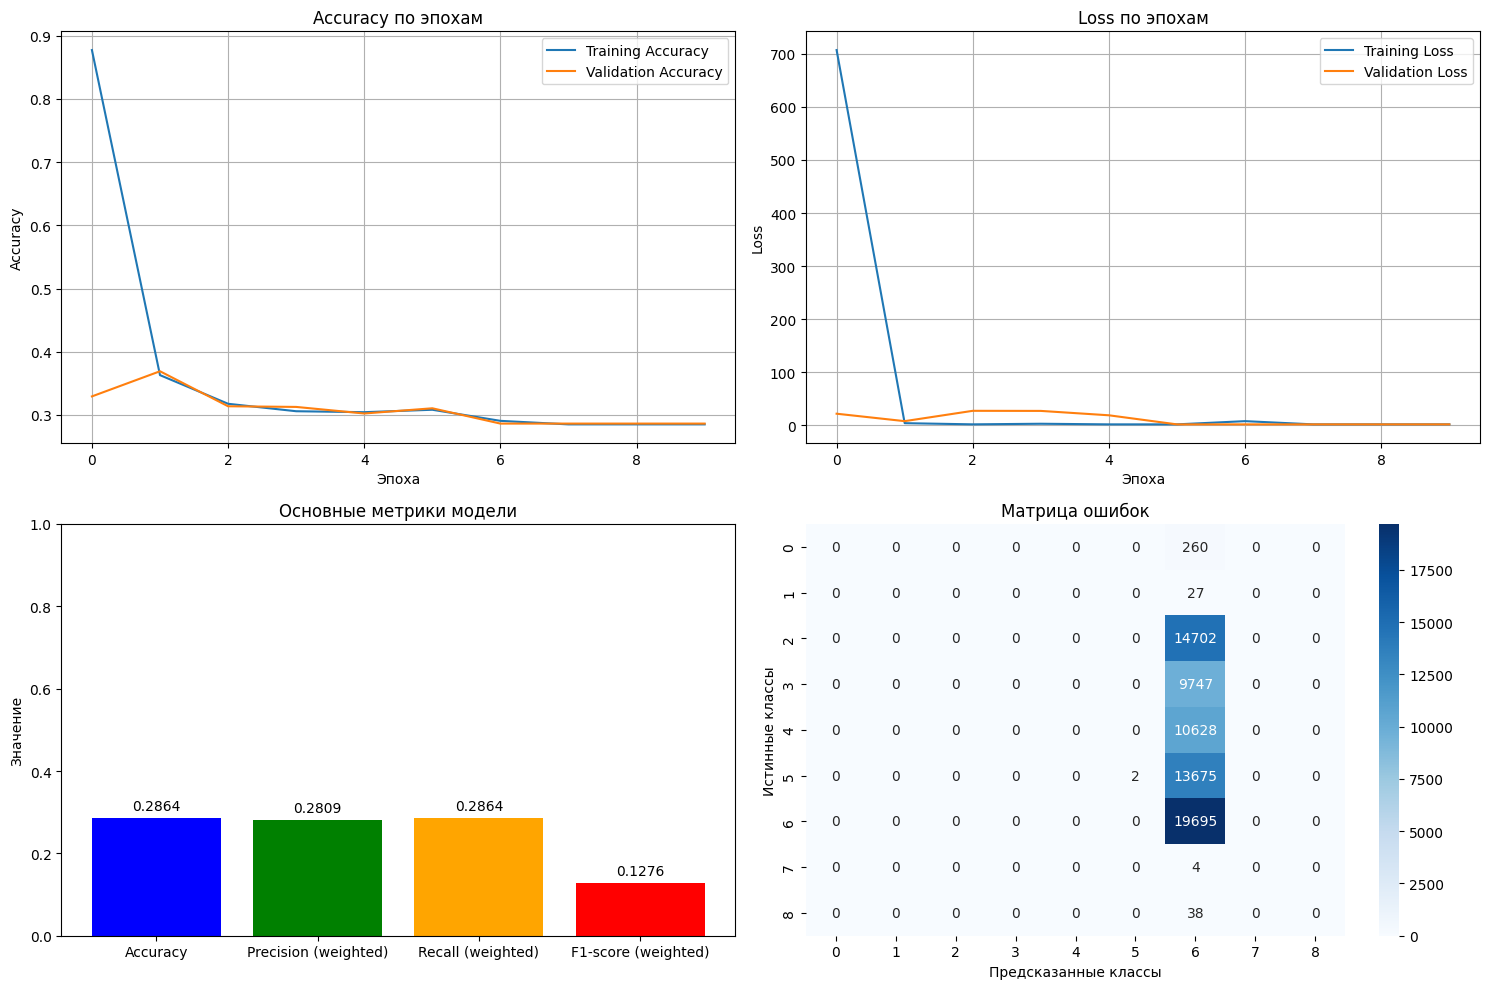

<Figure size 1200x600 with 0 Axes>

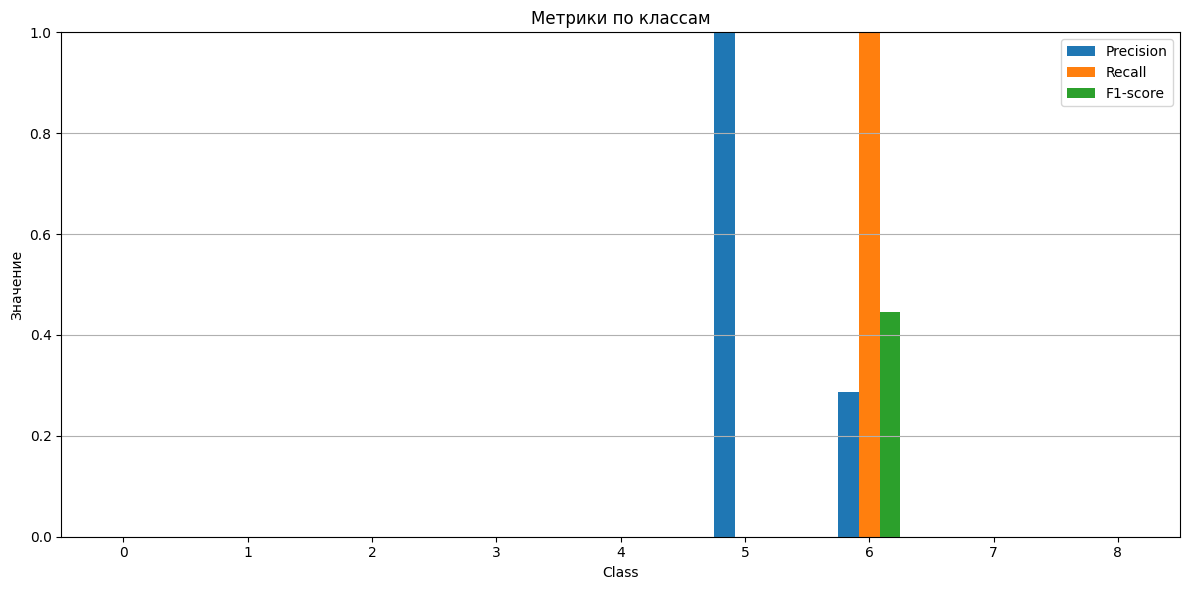

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers, Input
from sklearn.metrics import classification_report

# Создание и обучение CNN модели
model = models.Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели с сохранением истории
history = model.fit(X_train, y_train, 
                   epochs=10, 
                   batch_size=32, 
                   validation_data=(X_test, y_test))

# Оценка модели
test_loss, test_acc = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred, output_dict=True)

results = {
    'Model': ['CNN'],
    'Accuracy': [test_acc],
    'Precision (weighted)': [report['weighted avg']['precision']],
    'Recall (weighted)': [report['weighted avg']['recall']],
    'F1-score (weighted)': [report['weighted avg']['f1-score']],
    'Test Loss': [test_loss],
    'Training Time (epochs)': [len(history.history['loss'])]
}

results_df = pd.DataFrame(results)
print("\nРезультаты CNN модели:")
print("="*70)
print(results_df.to_string(index=False, float_format="%.4f"))
print("="*70)

results_df.to_csv('cnn_model_results_insdn.csv', index=False)

plt.figure(figsize=(15, 10))

# График 1: Кривые обучения (Accuracy)
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# График 2: Кривые обучения (Loss)
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# График 3: Основные метрики
plt.subplot(2, 2, 3)
metrics = ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1-score (weighted)']
values = [test_acc, 
          report['weighted avg']['precision'],
          report['weighted avg']['recall'],
          report['weighted avg']['f1-score']]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Основные метрики модели')
plt.ylabel('Значение')
plt.ylim(0, 1.0)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')

# График 4: Матрица ошибок (Confusion Matrix)
plt.subplot(2, 2, 4)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')

plt.tight_layout()
plt.savefig('cnn_model_performance_insdn.png')
plt.show()

# Дополнительные графики по классам
if len(np.unique(y_true)) > 2:
    plt.figure(figsize=(12, 6))
    class_metrics = []
    for class_name in report:
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            class_metrics.append({
                'Class': class_name,
                'Precision': report[class_name]['precision'],
                'Recall': report[class_name]['recall'],
                'F1-score': report[class_name]['f1-score']
            })
    
    class_metrics_df = pd.DataFrame(class_metrics)
    class_metrics_df.plot(x='Class', kind='bar', rot=0, figsize=(12, 6))
    plt.title('Метрики по классам')
    plt.ylabel('Значение')
    plt.ylim(0, 1.0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('cnn_class_metrics_insdn.png')
    plt.show()

In [106]:
df_combined = pd.concat([df_normal, df_metasploitable, df_OVS], axis=0, ignore_index=True)
X = df_combined.drop(columns=["Label"])  # Все колонки, кроме целевой
y = df_combined["Label"]  # Целевая переменная

In [107]:
df_combined['Src ip'] = df_combined['Src IP'].apply(lambda x: int(''.join(x.split('.'))))
df_combined['Dst ip'] = df_combined['Dst IP'].apply(lambda x: int(''.join(x.split('.'))))
df_combined['Flow_ID_Part1'] = df_combined['Flow ID'].apply(lambda x: int(x.split('.')[1]))

df_combined = df_combined.drop(columns=['Src IP'])
df_combined = df_combined.drop(columns=['Dst IP'])
df_combined = df_combined.drop(columns=['Flow ID'])

In [108]:
df_combined['Timestamp'] = pd.to_datetime(df_combined['Timestamp'], format='mixed')

# Извлечение полезных признаков
df_combined['Year'] = df_combined['Timestamp'].dt.year
df_combined['Month'] = df_combined['Timestamp'].dt.month
df_combined['Day'] = df_combined['Timestamp'].dt.day
df_combined['Hour'] = df_combined['Timestamp'].dt.hour
df_combined['Minute'] = df_combined['Timestamp'].dt.minute
df_combined['Second'] = df_combined['Timestamp'].dt.second
df_combined['DayOfWeek'] = df_combined['Timestamp'].dt.dayofweek  # День недели (0 - понедельник, 6 - воскресенье)

# Удаление исходной колонки Timestamp
df_combined = df_combined.drop(columns=['Timestamp'])

In [109]:
X = df_combined.drop(columns=["Label"])  # Все колонки, кроме целевой
y = df_combined["Label"]

In [110]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32) 
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
print(f'тип X_train: {X_train.dtype}')
print(f'тип y_train: {y_train.dtype}')
print(f'тип X_test: {X_test.dtype}')
print(f'тип y_test: {y_test.dtype}')

тип X_train: float32
тип y_train: float32
тип X_test: float32
тип y_test: float32


In [65]:
# Создание модели CNN
model = models.Sequential()
# Используем Input как первый слой
model.add(Input(shape=(X_train.shape[1], 1)))  # Указываем форму входных данных

model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))  # Выходной слой

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Тестовая точность: {test_acc:.4f}')

Epoch 1/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 64s 7ms/step - accuracy: 0.6671 - loss: 5508831.0000 - val_accuracy: 0.9783 - val_loss: 415.3138
Epoch 2/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 61s 7ms/step - accuracy: 0.9485 - loss: 1957.2404 - val_accuracy: 0.9696 - val_loss: 60.5375
Epoch 3/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 60s 7ms/step - accuracy: 0.9494 - loss: 46.1281 - val_accuracy: 0.9256 - val_loss: 0.8277
Epoch 4/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 60s 7ms/step - accuracy: 0.9132 - loss: 0.6010 - val_accuracy: 0.9118 - val_loss: 0.2418
Epoch 5/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 61s 7ms/step - accuracy: 0.9108 - loss: 3.6683 - val_accuracy: 0.9118 - val_loss: 0.2029
Epoch 6/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 68s 8ms/step - accuracy: 0.9111 - loss: 12.3715 - val_accuracy: 0.9135 - val_loss: 0.1931
Epoch 7/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 59s 7ms/step - accuracy: 0.9003 - loss: 8.3384 - val_accuracy: 0.9078 - val_loss: 0.2094
Epoch 8/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 16433s 2s/step - accuracy: 

Epoch 1/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.6250 - loss: 6675587.0000 - val_accuracy: 0.8498 - val_loss: 7997.7593
Epoch 2/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9418 - loss: 2866.5037 - val_accuracy: 0.9401 - val_loss: 104.6876
Epoch 3/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.9220 - loss: 738.3781 - val_accuracy: 0.9156 - val_loss: 74.3111
Epoch 4/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9044 - loss: 3427.7351 - val_accuracy: 0.9186 - val_loss: 42.5063
Epoch 5/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.8985 - loss: 7181.7578 - val_accuracy: 0.9056 - val_loss: 149.2079
Epoch 6/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.8795 - loss: 414.4600 - val_accuracy: 0.5128 - val_loss: 14.1107
Epoch 7/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.4845 - loss: 3.4617 - val_accuracy: 0.4643 - val_loss: 1.3221
Epoch 8/10
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step

c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu


=== Результаты CNN модели ===
Model  Test Accuracy  Test Loss  Precision (weighted)  Recall (weighted)  F1-score (weighted)  Training Epochs
  CNN         0.3967     1.3949                0.4326             0.3967               0.2933               10


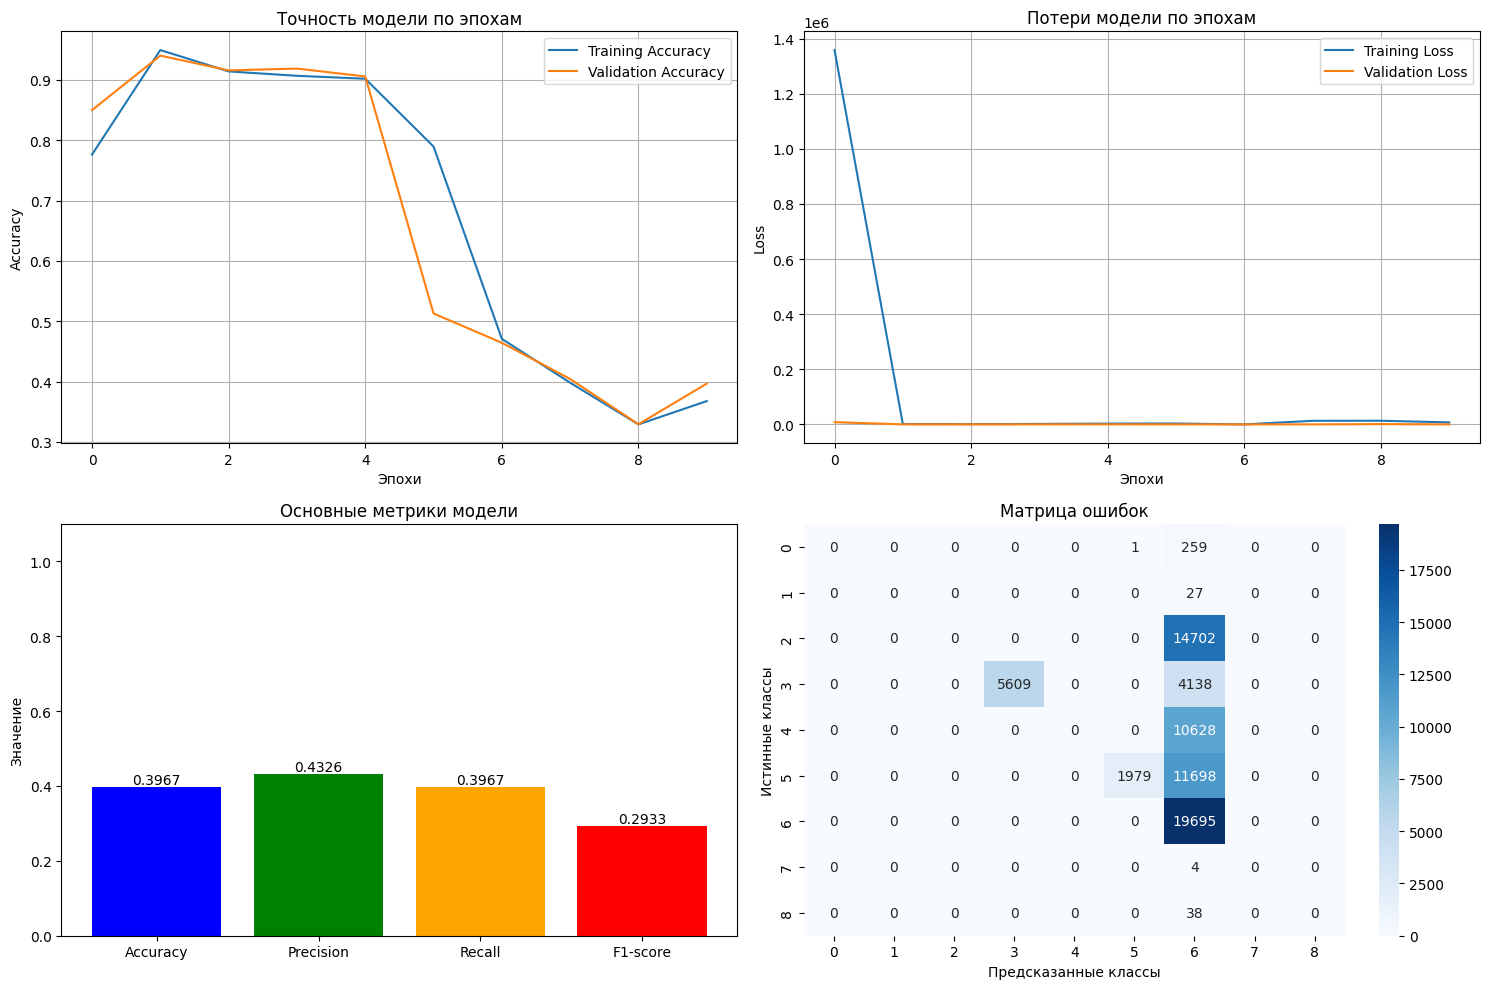

<Figure size 1200x600 with 0 Axes>

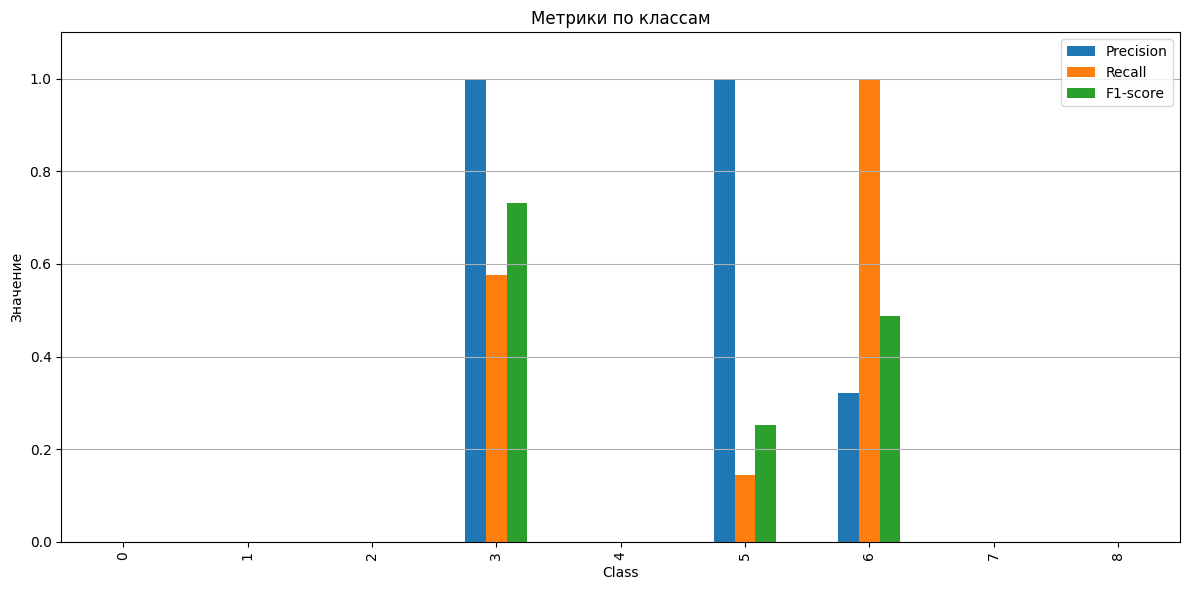

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers, Input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Создаем и обучаем CNN модель
model = models.Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель с сохранением истории
history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(X_test, y_test))

# Оценка модели
test_loss, test_acc = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Генерируем отчет о классификации
report = classification_report(y_true, y_pred, output_dict=True)

# Создаем таблицу результатов
results = {
    'Model': ['CNN'],
    'Test Accuracy': [test_acc],
    'Test Loss': [test_loss],
    'Precision (weighted)': [report['weighted avg']['precision']],
    'Recall (weighted)': [report['weighted avg']['recall']],
    'F1-score (weighted)': [report['weighted avg']['f1-score']],
    'Training Epochs': [len(history.history['loss'])]
}

results_df = pd.DataFrame(results)
print("\n=== Результаты CNN модели ===")
print(results_df.to_string(index=False, float_format="%.4f"))

# Сохраняем таблицу
results_df.to_csv('cnn_model_results_insdn2.csv', index=False)

# Создаем графики
plt.figure(figsize=(15, 10))

# График 1: Accuracy на тренировочных и валидационных данных
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точность модели по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# График 2: Loss на тренировочных и валидационных данных
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Потери модели по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# График 3: Основные метрики модели
plt.subplot(2, 2, 3)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [test_acc, 
          report['weighted avg']['precision'],
          report['weighted avg']['recall'],
          report['weighted avg']['f1-score']]

bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Основные метрики модели')
plt.ylabel('Значение')
plt.ylim(0, 1.1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# График 4: Матрица ошибок
plt.subplot(2, 2, 4)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')

plt.tight_layout()
plt.savefig('cnn_model_performance_insdn2.png', dpi=300)
plt.show()

# 3. Дополнительные графики
if len(np.unique(y_true)) > 2:
    # График метрик по классам
    plt.figure(figsize=(12, 6))
    class_report = []
    for class_name in report:
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            class_report.append({
                'Class': class_name,
                'Precision': report[class_name]['precision'],
                'Recall': report[class_name]['recall'],
                'F1-score': report[class_name]['f1-score'],
                'Support': report[class_name]['support']
            })
    
    class_df = pd.DataFrame(class_report)
    class_df.plot(x='Class', y=['Precision', 'Recall', 'F1-score'], 
                 kind='bar', figsize=(12, 6))
    plt.title('Метрики по классам')
    plt.ylabel('Значение')
    plt.ylim(0, 1.1)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig('cnn_class_metrics_insdn2.png', dpi=300)
    plt.show()